<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/ActividadSemanal7_Notebook1y2_A01182676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkblue">Actividad Semanal 7</font>**
##**<font color="darkorange">  Regresiones y K means</font>**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y analítica de datos**
####**Tecnológico de Monterrey**
#####**Prof: María de la Paz Rico Fernández**

###**<font color="darkgray">Nombre del estudiante: Dante Rodrigo Serna Camarillo</font>**
###**<font color="darkgray">Matrícula: A01182676</font>**


# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [461]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [462]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

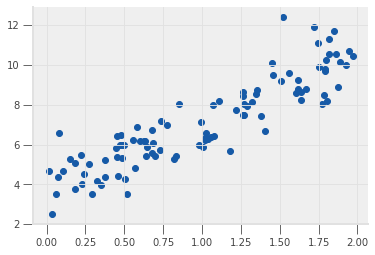

In [463]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [464]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [465]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [466]:
#X_fit[]

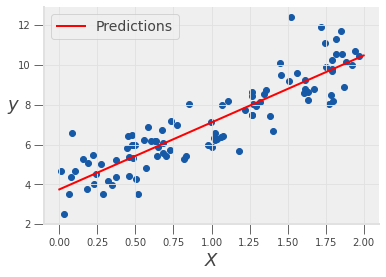

In [467]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [468]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [469]:
X_new.shape

(2, 1)

In [470]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [471]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [472]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [473]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

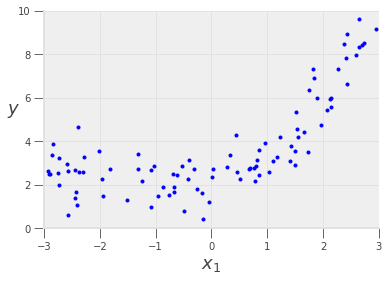

In [474]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [475]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [476]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [477]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [478]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [479]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [480]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

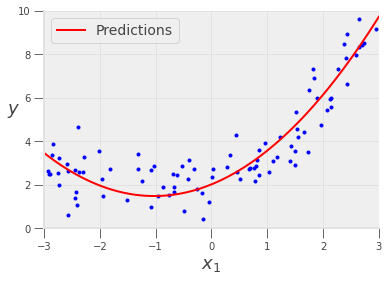

In [481]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# <b><font color="Red"> Notebook1 - Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

### <b><font color="orange"> Support Functions

In [84]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [109]:
def printTrainingMetrics(y_train, y_pred, modelName):
  print("*****"*15)
  print(modelName,': Train Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred ))
  print(modelName,': Train Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
  print(modelName,': Train Metrics : r2_score',metrics.r2_score(y_train, y_pred))
  

In [110]:
def printTestMetrics(y_test, y_pred, modelName):
  print("*****"*15)
  print(modelName,': Test Metrics : Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
  print(modelName,': Test Metrics : Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print(modelName,': Test Metrics : r2_score',metrics.r2_score(y_test, y_pred))


In [111]:
def describePartition(X,X_train,X_test):
  print(f'Numero total de registros en la bdd: {len(X)}')
  print("*****"*10)
  print(f'Numero total de registros en el training set: {len(X_train)}')
  print(f'Tamaño de X_train: {X_train.shape}')
  print("*****"*10)
  print(f'Mumero total de registros en el test dataset: {len(X_test)}')
  print(f'Tamaño del X_test: {X_test.shape}')

### Pre procesamiento

In [505]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
747,5.320845,39.790284
597,4.787700,33.916306
161,3.133644,56.183945
759,5.372548,31.049977
211,3.371696,38.754760
170,3.182915,45.496473
345,3.969255,44.564894
430,4.226731,37.715435
442,4.254261,30.261016
782,5.473178,29.967092


In [506]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [131]:
len(X)

1000

In [132]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

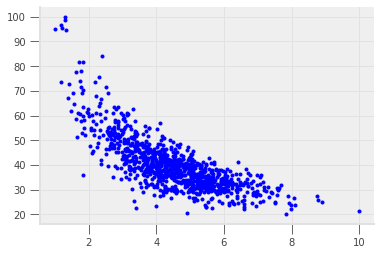

In [507]:
plt.plot(X,y,'b.')

### Parte 1 - Regresion lineal

In [508]:
#Particion de los datos:
from sklearn.model_selection import train_test_split #importamos la funcion train_test_split

#Utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

describePartition(X,X_train,X_test)

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 850
Tamaño de X_train: (850, 1)
**************************************************
Mumero total de registros en el test dataset: 150
Tamaño del X_test: (150, 1)


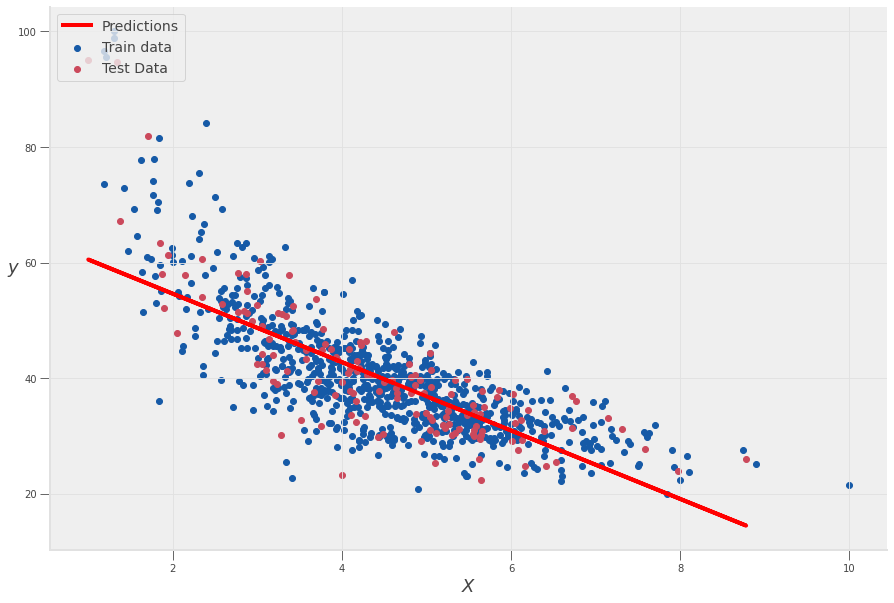

In [509]:
#lineal
from sklearn.linear_model import LinearRegression

#creamos nuestro objeto linear regressor
linearRegressor = LinearRegression(fit_intercept=True)
#entrenamos nuestro linear regressor con nuestra particion de datos de entrenamiento
linearRegressor.fit(X_train, y_train)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain = linearRegressor.predict(X_train)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit = linearRegressor.predict(X_test)

plt.figure(figsize=(15,10))
#utilizamos un scatter plot para los datos originales
plt.scatter(X_train, y_train, label="Train data")
#utilizamos un scatter plot para los datos originales
plt.scatter(X_test, y_test, label="Test Data")
#utilizamos un plot line para graficarr nuestro linear regressor.
plt.plot(X_test, y_fit, "r-", linewidth=4, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [510]:
linearRegressor.coef_, linearRegressor.intercept_

(array([-5.91602323]), 66.44764675174278)

**The estimated model:**

#### $\hat{y} = -5.916X + 66.447$

In [511]:
from sklearn import metrics
from sklearn.metrics import r2_score

lrMAE = metrics.mean_absolute_error(y_test, y_fit)
lrRSE = np.sqrt(metrics.mean_squared_error(y_test, y_fit))
lrR2S = metrics.r2_score(y_test, y_fit)

printTrainingMetrics(y_train,y_fitTrain,'LinearRegressor')
printTestMetrics(y_test, y_fit,'LinearRegressor')

***************************************************************************
LinearRegressor : Train Metrics : Error medio Absoluto (MAE): 4.888089732088765
LinearRegressor : Train Metrics : Root Mean Squared Error: 6.806557245416021
LinearRegressor : Train Metrics : r2_score 0.5698418288561948
***************************************************************************
LinearRegressor : Test Metrics : Error medio Absoluto (MAE): 5.011595088997378
LinearRegressor : Test Metrics : Root Mean Squared Error: 7.2416891490838875
LinearRegressor : Test Metrics : r2_score 0.6171440942171167


### <b><font color="orange"> Parte 2 - Regresion polinomial

In [485]:
#polinomial
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
X = df[['Number of Units']]
y = df['Manufacturing Cost']

#utilizaremos un orde polinomial de dos
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#aplicamos un poly transform a nuestros datos
X_poly = poly_features.fit_transform(X)

#tambien utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.15, random_state = 101)

describePartition(X,X_train_poly,X_test_poly)

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 850
Tamaño de X_train: (850, 2)
**************************************************
Mumero total de registros en el test dataset: 150
Tamaño del X_test: (150, 2)


In [486]:
#instanciamos un objeto de linear Regression
linearRegressorPoly = LinearRegression(fit_intercept=True)
#entrenamos utilizando nuestros datos polinomiales
linearRegressorPoly.fit(X_train_poly, y_train_poly)
#obtenemos nuestros coeficientes
linearRegressorPoly.coef_, linearRegressorPoly.intercept_

(array([-16.27563255,   1.12121998]), 88.38865903399889)

**The estimated model:**

#### $\hat{y} =  -16.275X +1.121X^2 + 88.38$

In [489]:
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain_poly = linearRegressorPoly.predict(X_train_poly)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit_poly = linearRegressorPoly.predict(X_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


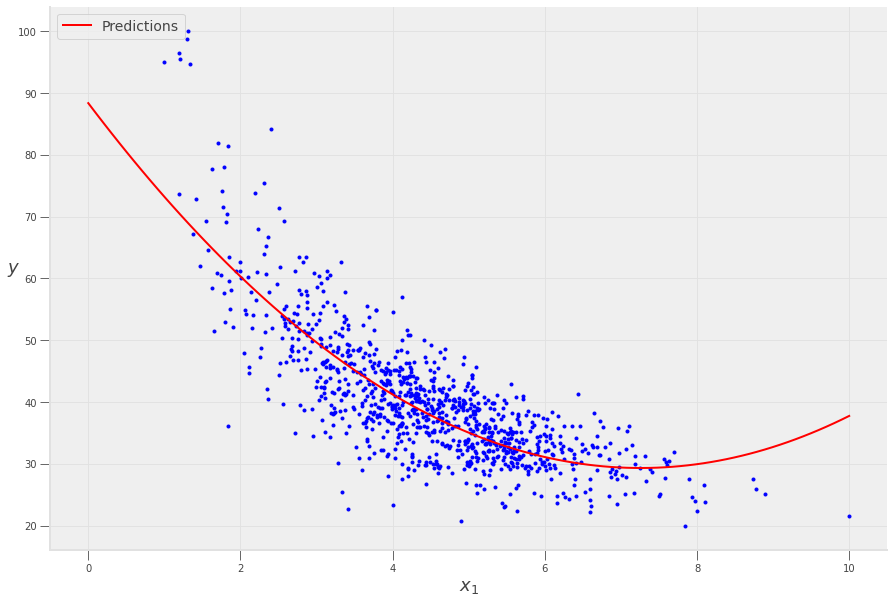

In [490]:
X_new=np.linspace(-0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = linearRegressorPoly.predict(X_new_poly)

plt.figure(figsize=(15,10))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [491]:
from sklearn import metrics
from sklearn.metrics import r2_score

polyMAE = metrics.mean_absolute_error(y_test_poly, y_fit_poly)
polyRSE = np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly))
polyR2S = metrics.r2_score(y_test_poly, y_fit_poly)

printTrainingMetrics(y_train_poly,y_fitTrain_poly,'Polinomial Regression')
printTestMetrics(y_test_poly,y_fit_poly,'Polinomial')

***************************************************************************
Polinomial Regression : Train Metrics : Error medio Absoluto (MAE): 4.537520932938372
Polinomial Regression : Train Metrics : Root Mean Squared Error: 6.140203128683162
Polinomial Regression : Train Metrics : r2_score 0.6499430928372091
***************************************************************************
Polinomial : Test Metrics : Error medio Absoluto (MAE): 4.459445302443204
Polinomial : Test Metrics : Root Mean Squared Error: 6.081945518433532
Polinomial : Test Metrics : r2_score 0.7299521995869951


### Parte 3 - Regresion Ridge

In [492]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
X = df[['Number of Units']]
y = df['Manufacturing Cost']
#utilizaremos un orde polinomial de dos
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#aplicamos un poly transform a nuestros datos
X_poly = poly_features.fit_transform(X)

#tambien utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.15, random_state = 101)

describePartition(X, X_train_poly, X_test_poly)

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 850
Tamaño de X_train: (850, 2)
**************************************************
Mumero total de registros en el test dataset: 150
Tamaño del X_test: (150, 2)


In [493]:
#instanciamos un objeto de linear Regression
ridgeRegressor = Ridge()
#entrenamos utilizando nuestros datos polinomiales
ridgeRegressor.fit(X_train_poly, y_train_poly)
#obtenemos nuestros coeficientes
ridgeRegressor.coef_, linearRegressorPoly.intercept_

(array([-16.02856067,   1.09564326]), 88.38865903399889)

**The estimated model:**

#### $\hat{y} =  -16.028X +1.095X^2 + 88.38$

In [494]:
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain_poly_ridge = ridgeRegressor.predict(X_train_poly)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit_poly_ridge = ridgeRegressor.predict(X_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


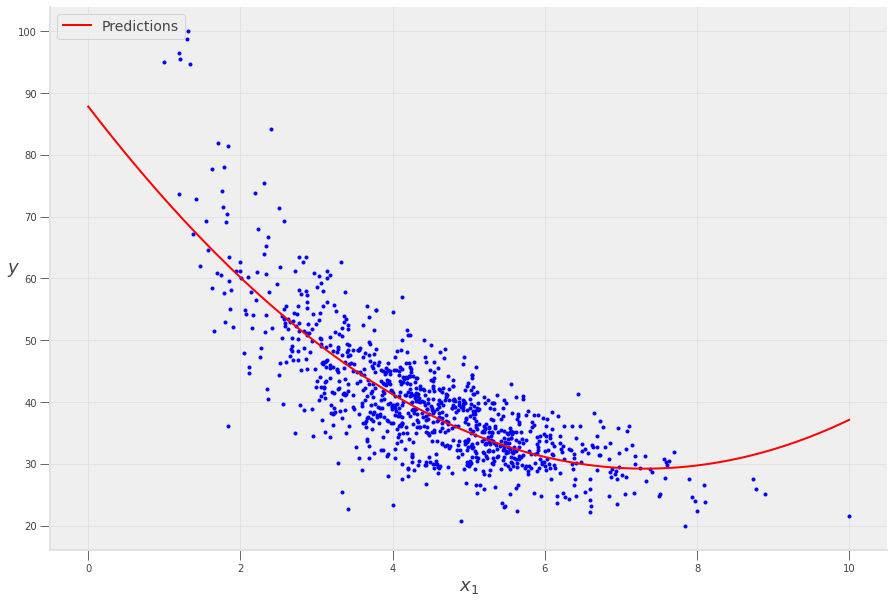

In [496]:
X_new=np.linspace(-0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = ridgeRegressor.predict(X_new_poly)
plt.figure(figsize=(15,10))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [497]:
from sklearn import metrics
from sklearn.metrics import r2_score

ridgeMAE = metrics.mean_absolute_error(y_test_poly, y_fit_poly_ridge)
ridgeRSE = np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly_ridge))
ridgeR2S = metrics.r2_score(y_test_poly, y_fit_poly_ridge)

printTrainingMetrics(y_train_poly,y_fitTrain_poly_ridge,'Ridge ')
printTestMetrics(y_test_poly, y_fit_poly_ridge,'Ridge')

***************************************************************************
Ridge  : Train Metrics : Error medio Absoluto (MAE): 4.532878081644214
Ridge  : Train Metrics : Root Mean Squared Error: 6.140585191679356
Ridge  : Train Metrics : r2_score 0.6498995281703834
***************************************************************************
Ridge : Test Metrics : Error medio Absoluto (MAE): 4.45644257105236
Ridge : Test Metrics : Root Mean Squared Error: 6.0942756321610485
Ridge : Test Metrics : r2_score 0.7288561373804443


### <b><font color="orange"> Parte 4 - Regresion Lasso

In [498]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
X = df[['Number of Units']]
y = df['Manufacturing Cost']
#utilizaremos un orde polinomial de dos
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#aplicamos un poly transform a nuestros datos
X_poly = poly_features.fit_transform(X)

#tambien utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.15, random_state = 101)

describePartition(X, X_train, X_test)

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [499]:
#instanciamos un objeto de linear Regression
lassoRegressor = Lasso()
#entrenamos utilizando nuestros datos polinomiales
lassoRegressor.fit(X_train_poly, y_train_poly)
#obtenemos nuestros coeficientes
lassoRegressor.coef_, linearRegressorPoly.intercept_

(array([-4.62167185, -0.07841468]), 88.38865903399889)

**The estimated model:**

#### $\hat{y} =  -4.621X - 0.078X^2 + 88.38$

In [500]:
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain_lasso = lassoRegressor.predict(X_train_poly)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit_poly_lasso = lassoRegressor.predict(X_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


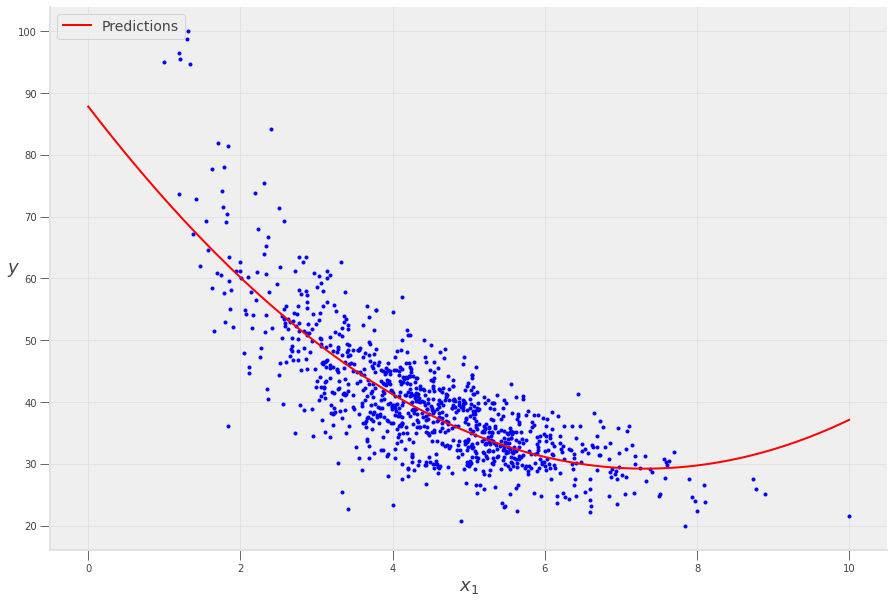

In [501]:
X_new=np.linspace(-0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = ridgeRegressor.predict(X_new_poly)
plt.figure(figsize=(15,10))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [502]:
from sklearn import metrics
from sklearn.metrics import r2_score

lassoMAE = metrics.mean_absolute_error(y_test_poly, y_fit_poly_lasso)
lassoRSE = np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly_lasso))
lassoR2S = metrics.r2_score(y_test_poly, y_fit_poly_lasso)

printTrainingMetrics(y_train_poly,y_fitTrain_lasso,'Lasso')
printTestMetrics(y_test_poly, y_fit_poly_lasso,'Lasso')

***************************************************************************
Lasso : Train Metrics : Error medio Absoluto (MAE): 4.898038932409921
Lasso : Train Metrics : Root Mean Squared Error: 6.938841761244852
Lasso : Train Metrics : r2_score 0.552959220822169
***************************************************************************
Lasso : Test Metrics : Error medio Absoluto (MAE): 5.150805902380525
Lasso : Test Metrics : Root Mean Squared Error: 7.519095197679952
Lasso : Test Metrics : r2_score 0.5872503059010867


### <b><font color="orange"> Parte 5 - Grafica comapracion de metricas

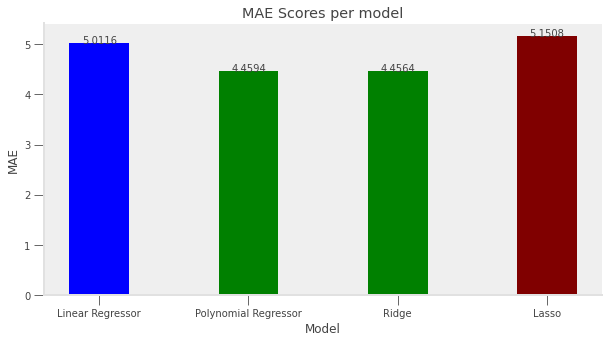

In [512]:
data = {'Linear Regressor':lrMAE, 'Polynomial Regressor' :polyMAE, 'Ridge':ridgeMAE,'Lasso':lassoMAE}
models = list(data.keys())
scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
x = ["Linear Regressor", "Polynomial Regressor","Ridge", "Lasso"]
y = [round(lrMAE,4), round(polyMAE,4), round(ridgeMAE,4), round(lassoMAE,4)]   
 
# creating the bar plot
addlabels(x,y)
plt.bar(models, scores, color=['blue', 'green', 'green', 'maroon'],
        width = 0.4)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE Scores per model")
plt.grid()
plt.show()


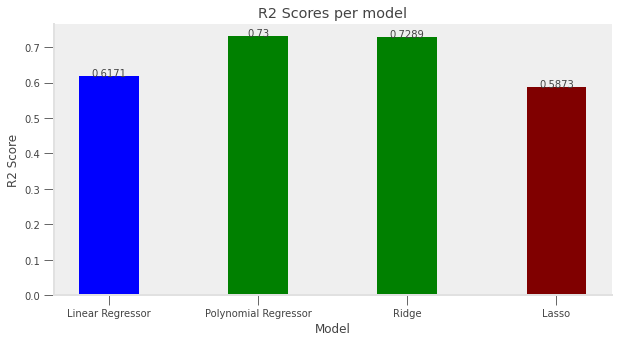

In [513]:
data = {'Linear Regressor':lrR2S, 'Polynomial Regressor' :polyR2S, 'Ridge':ridgeR2S,'Lasso':lassoR2S}
models = list(data.keys())
scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
x = ["Linear Regressor", "Polynomial Regressor","Ridge", "Lasso"]
y = [round(lrR2S,4), round(polyR2S,4), round(ridgeR2S,4), round(lassoR2S,4)]   
 
# creating the bar plot
addlabels(x,y)
plt.bar(models, scores, color=['blue', 'green', 'green', 'maroon'],
        width = 0.4)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Scores per model")
plt.grid()
plt.show()

### <b><font color="orange"> Parte 6 - Resutlados

# <b><font color="red"> Notebook1 - Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

### <b><font color="orange"> Pre procesamiento

In [514]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2009,2472930270,20140905T000000,485000.0,3,2.50,3110,9015,2.0,0,0,...,9,3110,0,1990,0,98058,47.4369,-122.147,2650,8960
10935,2141500070,20140619T000000,450000.0,4,2.50,2400,7693,2.0,0,0,...,8,2400,0,2003,0,98059,47.4881,-122.142,2400,8038
21496,1283800110,20140506T000000,776000.0,4,2.50,3040,6425,2.0,0,0,...,8,3040,0,2008,0,98052,47.6788,-122.117,3040,7800
15805,3904901300,20150414T000000,468000.0,3,2.25,1470,5597,2.0,0,0,...,7,1470,0,1985,0,98029,47.5674,-122.019,1610,5217
9578,3204300625,20140903T000000,785950.0,4,3.00,2530,4560,1.5,0,0,...,7,1540,990,1925,2014,98112,47.6287,-122.300,1640,4560
19889,1776460140,20140724T000000,395000.0,3,2.50,2130,5088,2.0,0,0,...,8,1840,290,2011,0,98019,47.7329,-121.976,2130,5762
5076,5100402764,20150415T000000,740000.0,3,1.00,1230,6380,1.5,0,0,...,7,1230,0,1927,0,98115,47.6947,-122.315,1250,6380
235,1762600320,20140610T000000,1025000.0,5,4.00,3760,28040,2.0,0,0,...,10,3760,0,1983,0,98033,47.6489,-122.183,3430,35096
3381,7854800090,20141107T000000,799950.0,3,3.00,2900,11769,2.0,0,0,...,10,2900,0,1997,0,98052,47.6993,-122.118,2900,9611
12893,1431600180,20150403T000000,335000.0,5,3.00,2660,7700,1.5,0,0,...,7,1670,990,1962,0,98058,47.4600,-122.174,1610,7700


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [516]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [517]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


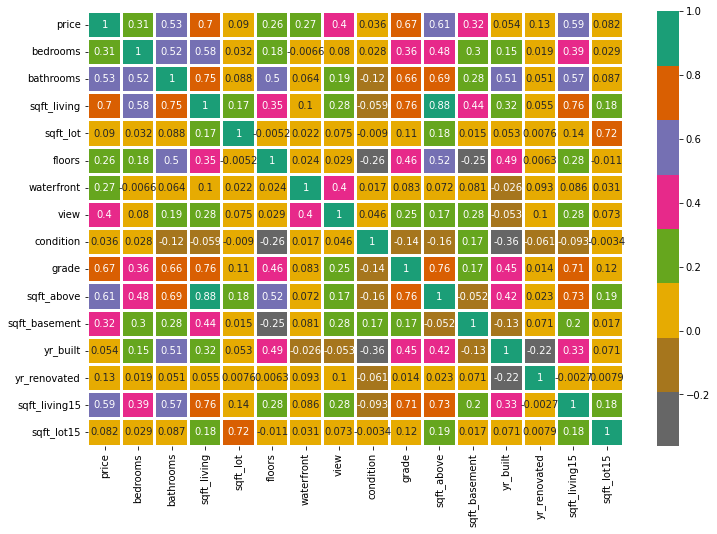

In [163]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [518]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [519]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


### <b><font color="orange"> Parte 1 - Regresion lineal

In [520]:
#lineal
from sklearn.linear_model import LinearRegression
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
X = df[features]
y = df[label]
#creamos nuestro objeto linear regressor
linearRegressor = LinearRegression(fit_intercept=True)
#entrenamos nuestro linear regressor con nuestra particion de datos de entrenamiento
linearRegressor.fit(X_train, y_train)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain = linearRegressor.predict(X_train)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit = linearRegressor.predict(X_test)

linearRegressor.coef_, linearRegressor.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

In [521]:
from sklearn import metrics
from sklearn.metrics import r2_score

lrMAE = metrics.mean_absolute_error(y_test, y_fit)
lrRSE = np.sqrt(metrics.mean_squared_error(y_test, y_fit))
lrR2S = metrics.r2_score(y_test, y_fit)

printTrainingMetrics(y_train, y_fitTrain,'LinearRegressor')
printTestMetrics(y_test, y_fit,'LinealRegressor')

***************************************************************************
LinearRegressor : Train Metrics : Error medio Absoluto (MAE): 139269.32939115583
LinearRegressor : Train Metrics : Root Mean Squared Error: 214234.8822754647
LinearRegressor : Train Metrics : r2_score 0.6529196653133833
***************************************************************************
LinealRegressor : Test Metrics : Error medio Absoluto (MAE): 137480.1388273178
LinealRegressor : Test Metrics : Root Mean Squared Error: 232133.3676240749
LinealRegressor : Test Metrics : r2_score 0.6579723205007814


### <b><font color="orange"> Parte 2 - Regresion polinomial

In [522]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
X = df[features]
y = df[label]
#utilizaremos un orde polinomial de dos
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#aplicamos un poly transform a nuestros datos
X_poly = poly_features.fit_transform(X)

#tambien utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.15, random_state = 101)

#instanciamos un objeto de linear Regression
linearRegressorPoly = LinearRegression(fit_intercept=True)
#entrenamos utilizando nuestros datos polinomiales
linearRegressorPoly.fit(X_train_poly, y_train_poly)
#obtenemos nuestros coeficientes
linearRegressorPoly.coef_, linearRegressorPoly.intercept_

(array([[ 9.64174268e+05, -1.18379107e+06,  2.43124978e+02,
         -3.26026212e+01, -2.01114219e+06, -2.82521815e+06,
         -2.48897303e+05,  5.64098383e+05,  9.91064392e+05,
         -8.83678436e+02, -1.06076994e+03, -8.43542908e+04,
         -2.75259036e+03,  3.93946489e+03, -3.03379467e+01,
          9.16854419e+02,  7.05416339e+03,  3.09041779e+02,
         -1.87468489e-02,  9.08855466e+03, -6.21368444e+03,
         -1.93693657e+03, -5.29283249e+03, -5.95549713e+03,
         -3.23065841e+02, -3.36209234e+02, -4.81291712e+02,
         -1.07566992e+01,  1.83093526e+01,  1.98699806e-01,
         -9.40995369e+03, -2.64527252e+01, -2.14599856e-01,
         -2.63035308e+04,  4.78301589e+04,  2.93249217e+03,
         -7.62459841e+02,  2.13740653e+04,  5.71540730e+01,
          4.20992390e+01,  5.54102621e+02, -1.57262906e+01,
         -1.92268960e+01,  5.36755392e-02, -6.16599554e+01,
          1.86170012e+01,  4.59467245e+00,  1.43924152e+02,
         -1.18906697e+01,  1.24015287e+0

In [523]:
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain_poly = linearRegressorPoly.predict(X_train_poly)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit_poly = linearRegressorPoly.predict(X_test_poly)

polyMAE = metrics.mean_absolute_error(y_test_poly, y_fit_poly)
polyRSE = np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly))
polyR2S = metrics.r2_score(y_test_poly, y_fit_poly)

printTrainingMetrics(y_train_poly, y_fitTrain_poly,'PolynomialRegressor')
printTestMetrics(y_test_poly, y_fit_poly,'PolynomialRegressor')

***************************************************************************
PolynomialRegressor : Train Metrics : Error medio Absoluto (MAE): 123381.37601336508
PolynomialRegressor : Train Metrics : Root Mean Squared Error: 183146.89196344264
PolynomialRegressor : Train Metrics : r2_score 0.7462822706086232
***************************************************************************
PolynomialRegressor : Test Metrics : Error medio Absoluto (MAE): 122595.0942375671
PolynomialRegressor : Test Metrics : Root Mean Squared Error: 185073.02324216225
PolynomialRegressor : Test Metrics : r2_score 0.7705667046647577


### <b><font color="orange"> Parte 3 - Regresion Ridge

In [524]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
X = df[features]
y = df[label]
#utilizaremos un orde polinomial de dos
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#aplicamos un poly transform a nuestros datos
X_poly = poly_features.fit_transform(X)

#tambien utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.15, random_state = 101)

In [525]:

#instanciamos un objeto de linear Regression
ridgeRegressor = Ridge()
#entrenamos utilizando nuestros datos polinomiales
ridgeRegressor.fit(X_train_poly, y_train_poly)
#obtenemos nuestros coeficientes
ridgeRegressor.coef_, linearRegressorPoly.intercept_

(array([[ 4.62911234e+05, -2.99972892e+05, -4.74605658e+02,
         -3.28583311e+01, -3.61339520e+05, -7.25609580e+04,
         -2.49771817e+05,  2.62369787e+05,  3.88996458e+05,
         -4.43882449e+02, -1.10689362e+02, -9.40137666e+04,
         -3.00041378e+03,  4.15887259e+03, -2.84673677e+01,
          8.83281715e+02,  2.79316236e+03, -9.27239363e+01,
         -2.05157998e-02,  5.38551830e+03, -1.71476020e+04,
         -1.25778053e+03, -2.78241516e+03, -6.34739119e+03,
          8.16494705e+01,  6.84293822e+01, -2.23184687e+02,
         -6.28500508e+00,  1.64075792e+01,  1.73784832e-01,
         -4.65367761e+03,  4.06777370e+01, -2.08724648e-01,
         -1.53248123e+04,  6.34417484e+04,  1.53669700e+03,
         -8.15968743e+03,  1.71457549e+04, -1.17118178e+01,
         -2.57896935e+01,  1.19329468e+02, -2.37327918e+01,
         -1.39035565e+01,  8.61334680e-02, -4.44865651e+01,
         -7.76930706e+01,  7.78893560e+01,  8.39341642e+01,
         -1.73948521e+01,  9.49873733e+0

In [526]:
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain_poly_ridge = ridgeRegressor.predict(X_train_poly)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit_poly_ridge = ridgeRegressor.predict(X_test_poly)

In [527]:
ridgeMAE = metrics.mean_absolute_error(y_test_poly, y_fit_poly_ridge)
ridgeRSE = np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly_ridge))
ridgeR2S = metrics.r2_score(y_test_poly, y_fit_poly_ridge)


printTrainingMetrics(y_train_poly, y_fitTrain_poly_ridge,'Ridge')
printTestMetrics(y_test_poly, y_fit_poly_ridge,'Ridge')

***************************************************************************
Ridge : Train Metrics : Error medio Absoluto (MAE): 123537.47391122892
Ridge : Train Metrics : Root Mean Squared Error: 183415.51282414034
Ridge : Train Metrics : r2_score 0.745537471124136
***************************************************************************
Ridge : Test Metrics : Error medio Absoluto (MAE): 122914.34219336751
Ridge : Test Metrics : Root Mean Squared Error: 185496.87399350482
Ridge : Test Metrics : r2_score 0.7695146136816169


### <b><font color="orange"> Parte 4 - Regresion Lasso

In [528]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
X = df[features]
y = df[label]
#utilizaremos un orde polinomial de dos
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#aplicamos un poly transform a nuestros datos
X_poly = poly_features.fit_transform(X)

#tambien utilizaremos una estrategia de 85% para datos de entrenamiento y 15% para datos de prueba, utilizamos un random sate de 101
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size = 0.15, random_state = 101)

In [529]:
#instanciamos un objeto de linear Regression
lassoRegressor = Lasso()
#entrenamos utilizando nuestros datos polinomiales
lassoRegressor.fit(X_train_poly, y_train_poly)
#obtenemos nuestros coeficientes
lassoRegressor.coef_, linearRegressorPoly.intercept_

#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fitTrain_lasso = lassoRegressor.predict(X_train_poly)
#una vez entrenado, utilizamos nuestra particion de test para realizar unas predicciones.
y_fit_poly_lasso = lassoRegressor.predict(X_test_poly)

lassoMAE = metrics.mean_absolute_error(y_test_poly, y_fit_poly_lasso)
lassoRSE = np.sqrt(metrics.mean_squared_error(y_test_poly, y_fit_poly_lasso))
lassoR2S = metrics.r2_score(y_test_poly, y_fit_poly_lasso)

printTrainingMetrics(y_train_poly, y_fitTrain_lasso,'Lasso')
printTestMetrics(y_test_poly, y_fit_poly_lasso,'Lasso')


***************************************************************************
Lasso : Train Metrics : Error medio Absoluto (MAE): 125079.68728563067
Lasso : Train Metrics : Root Mean Squared Error: 185859.0116189493
Lasso : Train Metrics : r2_score 0.7387123056251963
***************************************************************************
Lasso : Test Metrics : Error medio Absoluto (MAE): 123820.97744709886
Lasso : Test Metrics : Root Mean Squared Error: 187313.93136547148
Lasso : Test Metrics : r2_score 0.7649770019151578


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.173e+14, tolerance: 2.429e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### <b><font color="orange">  Parte 5 - Grafica comparacion de metricas

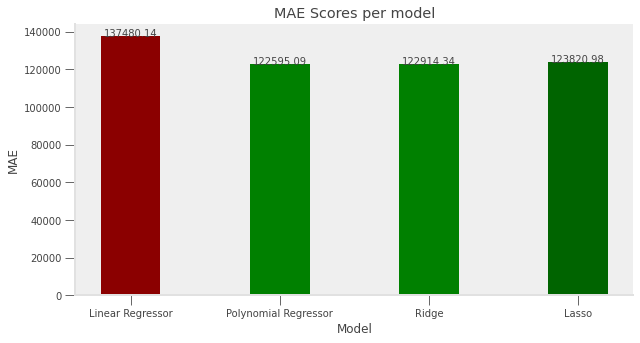

In [530]:
data = {'Linear Regressor':lrMAE, 'Polynomial Regressor' :polyMAE, 'Ridge':ridgeMAE,'Lasso':lassoMAE}
models = list(data.keys())
scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))

x = ["Linear Regressor", "Polynomial Regressor","Ridge", "Lasso"]
y = [round(lrMAE,2), round(polyMAE,2), round(ridgeMAE,2), round(lassoMAE,2)]      
addlabels(x, y) 
# creating the bar plot
plt.bar(models, scores, color=['darkred', 'green', 'green', 'darkgreen'],
        width = 0.4)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE Scores per model")
plt.grid()
plt.show()


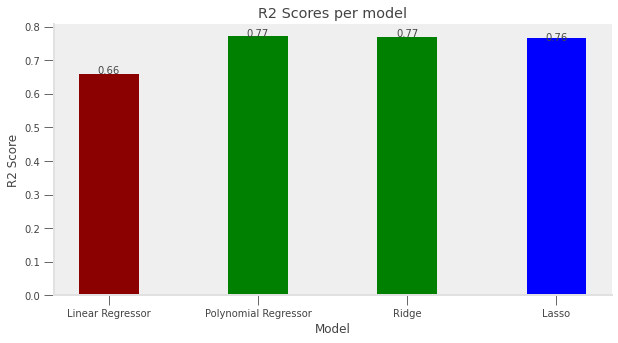

In [531]:
data = {'Linear Regressor':lrR2S, 'Polynomial Regressor' :polyR2S, 'Ridge':ridgeR2S,'Lasso':lassoR2S}
models = list(data.keys())
scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))

x = ["Linear Regressor", "Polynomial Regressor","Ridge", "Lasso"]
y = [round(lrR2S,2), round(polyR2S,2), round(ridgeR2S,2), round(lassoR2S,2)]        
 
# creating the bar plot
addlabels(x, y)
plt.bar(models, scores, color=['darkred', 'green', 'green', 'blue'],
        width = 0.4)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Scores per model")
plt.grid()
plt.show()

### <b><font color="orange"> Parte 6 - Conclusiones

Con base en los resultados de las métricas podemos determinar que un modelo polinomial es considerablemente mejor que una regresión lineal simple.<br>
También podemos ver que los resutlados con Ridge y Lasso no marcan una ventaja significativvamente en este caso, si acaso Ridge es ligeramente mejor que la regresioón polinomial sin ajuste. Creo que el hecho de que no hallamos obtenido mejores resultados en ridge o lasso se debe al número de dimensiones que adquiere el modelo.<br>
Pienso que el aplicar PCA para reducir del numero de dimensiones ayudaría a que ridge y lasso lograran mejores resutlados.

# <b><font color="red">Notebook 2

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [190]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 897 kB/s 
     |████████████████████████████████| 1.0 MB 34.6 MB/s 
     |████████████████████████████████| 1.7 MB 40.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 43.9 MB/s 
     |████████████████████████████████| 6.3 MB 41.8 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=52f2ac255c29bd7a7cbca7da8e2397cd48b46241538d942cacefcaab4c0d87f6
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=639e36019a048a4349eb2df60ab16bdbb8f22c6a413ccf1ec5430dc5057e8493
  Stored in directory: /root/.

In [191]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [192]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [193]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [376]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

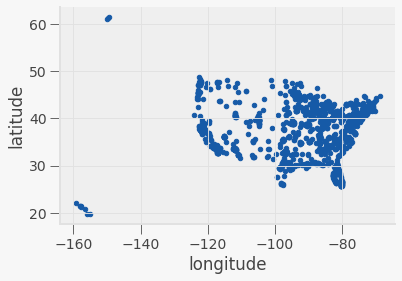

In [377]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [378]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [199]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [200]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [201]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [202]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [203]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

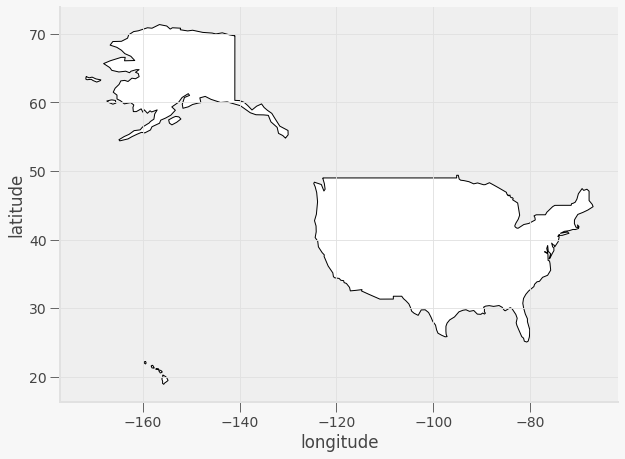

In [379]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

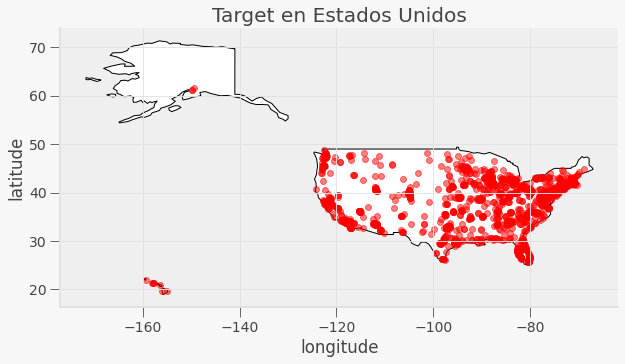

In [380]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [238]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)
kmeans.fit(latlong)
y_kmeans = kmeans.predict(latlong)

In [239]:
y_kmeans

array([10, 10, 10, ...,  8,  8,  8], dtype=int32)

In [210]:
centers = kmeans.cluster_centers_

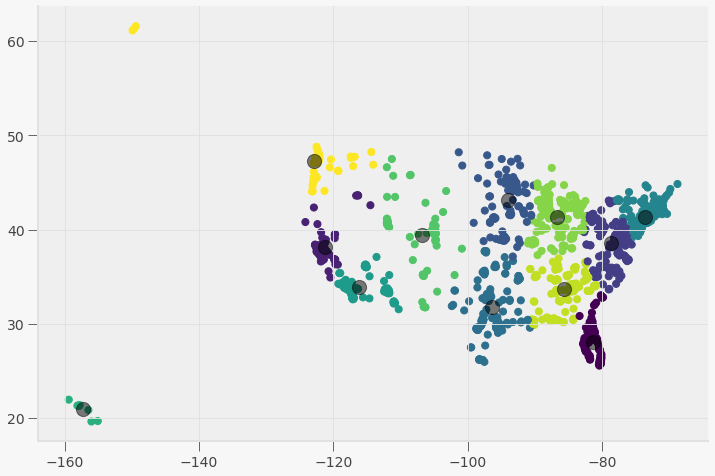

In [240]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

centers = kmeans.cluster_centers_

plt.scatter(latlong['longitude'], latlong['latitude'], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5);

In [243]:
centers

array([[  28.05224086,  -81.28727866],
       [  38.14964229, -121.257636  ],
       [  38.54772038,  -78.64769549],
       [  43.16681912,  -94.01241889],
       [  31.83418572,  -96.38635355],
       [  41.32111356,  -73.63567943],
       [  33.90549928, -116.10229923],
       [  20.94542771, -157.31225085],
       [  39.43875809, -106.79341373],
       [  41.31303016,  -86.63205159],
       [  33.7437522 ,  -85.66189429],
       [  47.28624426, -122.91403611]])

### <b><font color="orange"> Support Functions 

##### Funcion para calcular n Kmeans y graficar en el mapa de estados unidos

In [560]:
def getAddress(row):
  return geolocator.reverse(str(row[0])+","+str(row[1]))

In [558]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [565]:

def graphTargetWarehouseProposalWithNKmeans(num_kmeans, storesLatLon):
  #calculate Kmeans
  kmeans = KMeans(n_clusters=num_kmeans)
  kmeans.fit(storesLatLon)
  y_kmeans = kmeans.predict(storesLatLon)
  #cluster centers data
  centers = kmeans.cluster_centers_
  dfKmeans = pd.DataFrame(centers)
  dfKmeans.columns = ["latitude","longitude"]
  dfKmeans["Coordinates"] = list(zip(dfKmeans.longitude, dfKmeans.latitude))
  dfKmeans["Coordinates"] = dfKmeans["Coordinates"].apply(Point)
  #prepare traget stores data.
  dfStores = storesLatLon.copy()
  dfStores["Coordinates"] = list(zip(storesLatLon.longitude, storesLatLon.latitude))
  dfStores["Coordinates"] = dfStores["Coordinates"].apply(Point)

  # We mostly use the code from before --- we still want the country borders plotted --- and we
  # add a command to plot the cities
  fig, gax = plt.subplots(figsize=(15,14))

  gdfKmeans = gpd.GeoDataFrame(dfKmeans, geometry="Coordinates")
  gTargetStores = gpd.GeoDataFrame(dfStores, geometry="Coordinates")
  # By only plotting rows in which the continent is 'South America' we only plot, well,
  # South America.
  world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

  # This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
  # I want the cities as pale red dots.
  gTargetStores.plot(ax=gax, color='red', alpha = 0.5)
  gdfKmeans.plot(ax=gax, color='black', alpha =1.0, markersize=250, marker="$T$")

  gax.set_xlabel('longitude')
  gax.set_ylabel('latitude')
  gax.set_title('Target en Estados Unidos')

  gax.spines['top'].set_visible(False)
  gax.spines['right'].set_visible(False)

  plt.show()

  geolocator = Nominatim(user_agent="geoapiExercises")
  dfKmeans['location'] = dfKmeans.apply(lambda row : getAddress(row), axis = 1)
  print(dfKmeans['location'])

##### Funcion para calcular elbow graph de kmeans

In [394]:
def graphElbowKmeansInRange(lowerLimit,upperLimit,storesLatLon):
  Sum_of_squared_distances = []
  K = range(lowerLimit,upperLimit)
  for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(storesLatLon)
    Sum_of_squared_distances.append(kmeans.inertia_)
  plt.plot(K,Sum_of_squared_distances,'bx-')
  plt.xlabel('Values of K') 
  plt.ylabel('Sum of squared distances/Inertia') 
  plt.title('Elbow Method For Optimal k')
  plt.show()

##### Funcion para calcular silhouette_score graph de kmeans

In [393]:
from sklearn.metrics import silhouette_score
def graphSilhouetteScoreInRange(lowerLimit,upperLimit,storesLatLon):
  range_n_clusters = range(lowerLimit,upperLimit)
  silhouette_avg = []
  for num_clusters in range_n_clusters:
  
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(storesLatLon)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(storesLatLon, cluster_labels))

  plt.plot(range_n_clusters,silhouette_avg,'bx-')
  plt.xlabel('Values of K') 
  plt.ylabel('Silhouette score') 
  plt.title('Silhouette analysis For Optimal k')
  plt.show()

### <font color="orange"> Propuesta baseline con 12 KMeans

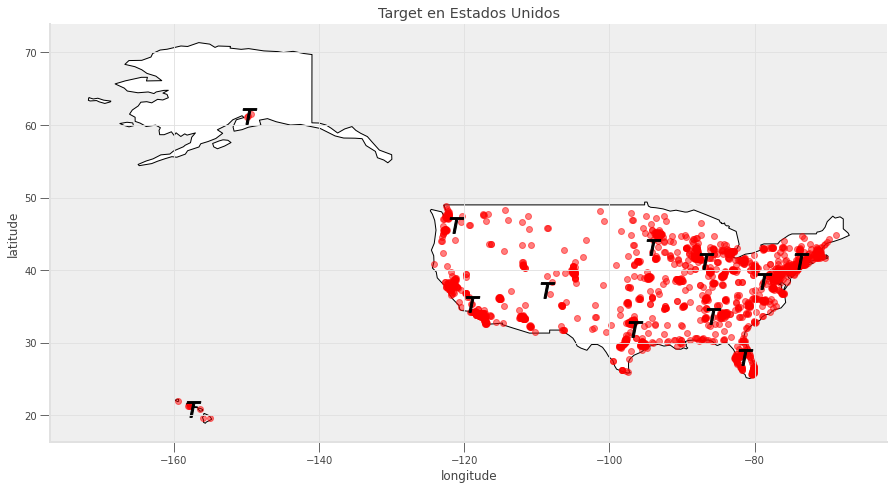

0     (Osceola County, Florida, United States, (28.0...
1     (Pinegrass Cutoff Road, Yakima County, Washing...
2     (290th Street, Kossuth County, Iowa, 50480, Un...
3     (5, Cider Mill Lane, Town of North Salem, West...
4     (Northeast Bike path, Bakersfield, Kern County...
5     (W 100 N, Starke County, Indiana, 46534, Unite...
6     (Calhoun County, Alabama, United States, (33.7...
7            (United States, (39.7837304, -100.445882))
8     (3386, Davis Corner Lane, Rockingham County, V...
9     (Richland, Navarro County, Texas, 76681, Unite...
10    (Horse Springs, Pack Trail, Montezuma County, ...
11    (Anchorage, Alaska, United States, (61.1758781...
Name: location, dtype: object


In [566]:
graphTargetWarehouseProposalWithNKmeans(12,latlong)

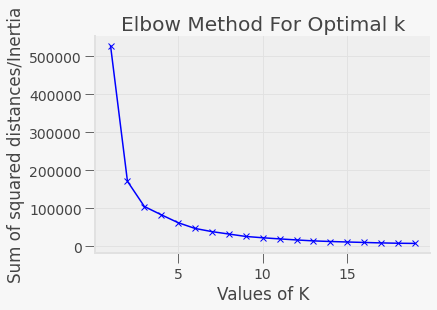

In [389]:
graphElbowKmeansInRange(1,20,latlong)

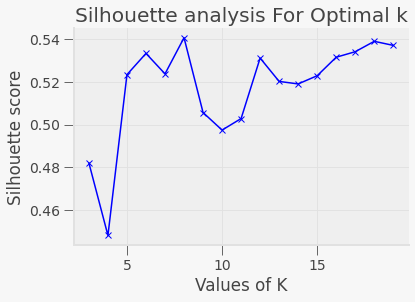

In [397]:
graphSilhouetteScoreInRange(3,20,latlong)

### <b><font color="orange">Modificar propuesta con base en elbow y silhouette graphs del baseline propuesto

El elbow graph nos indica que el número ideal de almacenes deberia ser 5, el silhoutte graph nos indica un valor de 8. Creo que esta difernecia es generada por las tiendas que no estan en el territorio principal de estados unidos - alaska, y hawait-. Vamos a ver la propuesta generada si removemos dichas tiendas del kmean.



In [398]:
latlong.shape

(1839, 2)

In [399]:
#removemos las tiendas que estan en hawai y alaska
mainLandTarget = latlong[latlong.longitude > -130]
mainLandTarget = mainLandTarget[mainLandTarget.latitude > 25]

In [400]:
mainLandTarget.shape

(1828, 2)

In [402]:
mainLandTargetPairs = mainLandTarget[['latitude','longitude']]
mainLandTargetPairs 

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422
...,...,...
1834,43.034293,-88.176840
1835,42.989604,-88.259806
1836,42.846799,-106.264166
1837,41.162019,-104.800048


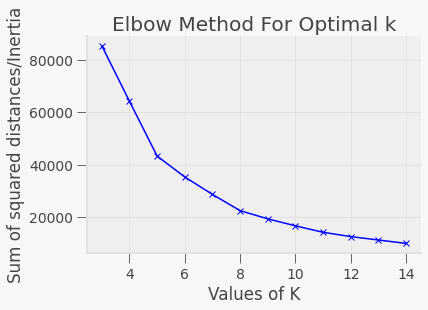

In [404]:
graphElbowKmeansInRange(3,15,mainLandTargetPairs)

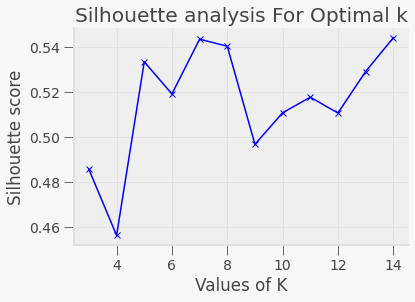

In [405]:
graphSilhouetteScoreInRange(3,15,mainLandTargetPairs)

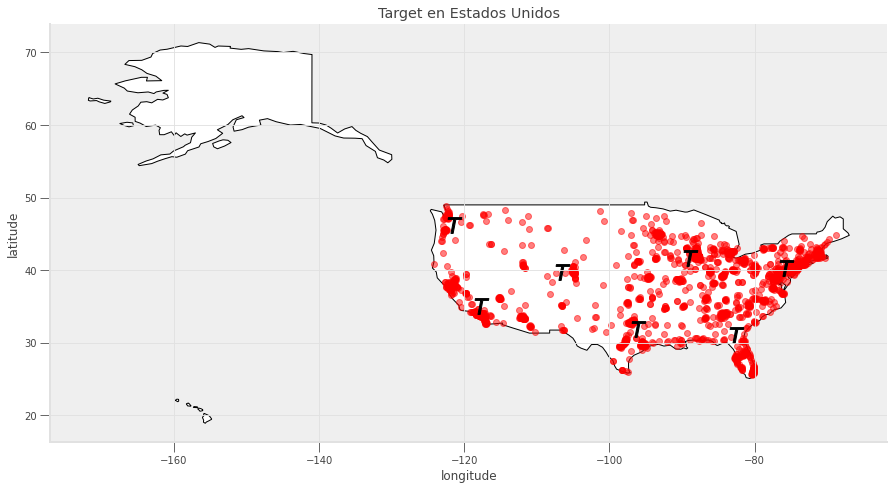

0    (North 47th Road, LaSalle County, Illinois, 60...
1    (Kern County, CAL Fire Southern Region, Califo...
2    (Jim Mixon Road, Ware County, Georgia, 31550, ...
3    (South Cleaver School Road, Colebrookdale Town...
4    (County Road 196, Freestone County, Texas, Uni...
5    (Yakima County, Washington, United States, (46...
6    (Eagle County, Colorado, United States, (39.61...
Name: location, dtype: object


In [567]:
graphTargetWarehouseProposalWithNKmeans(7,mainLandTargetPairs)

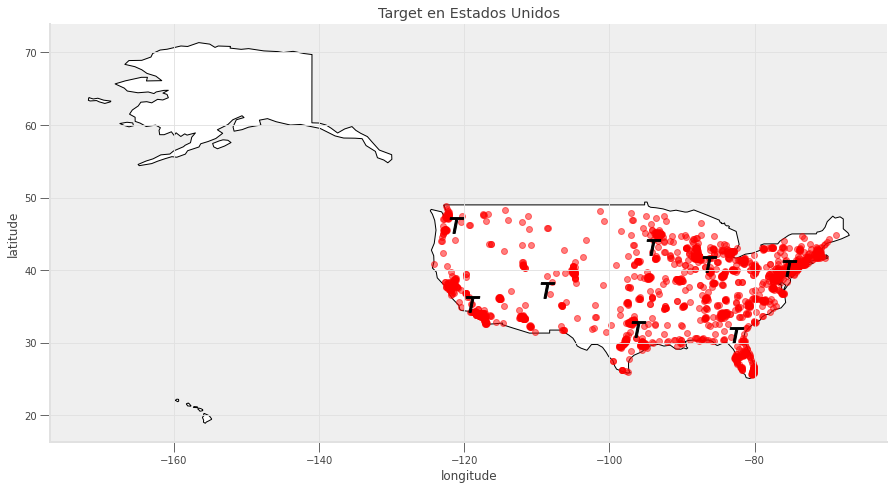

0    (Briarwood Drive, Hilltown Township, Bucks Cou...
1    (Horse Springs, Pack Trail, Montezuma County, ...
2    (320th Street, Hancock County, Iowa, 50484, Un...
3    (FM 1124, Freestone County, Texas, United Stat...
4    (Ware County, Georgia, United States, (31.1113...
5    (Pinegrass Cutoff Road, Yakima County, Washing...
6    (Cass County, Indiana, United States, (40.8571...
7    (Northeast Bike path, Bakersfield, Kern County...
Name: location, dtype: object


In [568]:
graphTargetWarehouseProposalWithNKmeans(8,mainLandTargetPairs)

### <b><font color="orange">Conclusiones</font></b>
Podemos concluir que el número adecuado de almacenes es de 8, con base en la exploración y nuestro análisis con elbow y silhoutte. Tambien es importante considerar como un número mayor de kmeans eventualmente agregará un almacen en hawai y otro en alaska.
<br> Creo que es análisis nos ayuda a determinar que 8 almacenes en el _mainland_ mas otros dos - en hawai y alaska- serian una combinación adecuada.
<br><br>
Creo que para porblemas que involucran ubicaciones e smuy importante graficar utilizando mapas que nos permitan entender realmente la naturaleza de los datos, y que esto nos ayude a tomar decisiones adecuadas de como atacar el problema. 
<b><br> Con base a una investigación encontré que combinar el uso de gráficas de elbow y el scoring de silhoutte nos ayuda a tomar la decisión sobre enl numeor de clusters de mejor forma, comos e hizo en este caso.